In [1]:
import matplotlib.pyplot as plt
plt.style.use('styles/gcpeixoto-book.mplstyle')

# Modelagem Matemática em Ciências Computacionais e Engenharias

Ao deparar-se com um problema real, profissionais com envolvimento nos diversos setores da economia buscam as melhores estratégias existentes em seu campo de atuação para resolvê-lo. Supondo que um problema específico possua apenas uma solução e que pudéssemos assemelhá-lo a uma questão específica, a solução desse problema equivaleria à resposta para a pergunta e a forma de respondê-la à estratégia seguida para buscar a solução, a qual também poderíamos chamar de _método_. 

Alguns exemplos de perguntas que eventualmente surgiriam em domínios específicos do conhecimento como base para a resolução de um problema são:

- que carga máxima seria admissível para um elevador de edifício-garagem de 15 andares, de maneira que seus cabos, mecanismos e estrutura de elevação não sejam danificados por excesso de tensão? (Engenharia Civil)
- quantos mililitros de um fármaco anti-alérgico poderiam ser injetados por minuto na corrente sanguínea de um indivíduo de modo que não haja efeitos colaterais de overdose? (Biologia)
- que magnitude mínima de pressão seria necessária para mover um fluido refrigerante por um nanotubo de um componente eletrônico aquecido de maneira a resfriá-lo em 2% de sua temperatura operacional? (Engenharia Mecânica)
- qual o tempo de vida útil de um microprocessador operando 16 horas por dia em alto clock sob voltagem de 1.46v e resfriamento contínuo? (Engenharia da Computação) 

Evidentemente, perguntas como essas podem ser extremamente difíceis de responder, sendo necessário o envolvimento de uma equipe multidisciplinar, com experiência em variados assuntos, para se chegar a um denominador comum, ao menos pela via consensual. A primeira das perguntas pode envolver profissionais especializados em ciência dos materiais, eletrônica e pneumática; a segunda, matemáticos aplicados e cardiologistas; a terceira, físicos, analistas de energia e estatísticos; a última, engenheiros elétricos e químicos.

Resolver um problema científico no mundo atual requer não apenas conhecimento teórico e prático, mas também outras habilidades como a capacidade de pensar computacionalmente e resolver problemas utilizando o enorme potencial da computação de alto desempenho. Na verdade, a maioria dos problemas atuais não pode ser resolvida sem a intervenção de métodos numéricos. Há, certamente, um amplo leque de opções metodológicas para resolvê-los. Entretanto, em linhas gerais, são quatro as fases de resolução de um problema aplicado, como mostra a  {numref}`passos-modelagem`.

```{figure} figs/passos-modelagem.png
---
width: 700px
name: passos-modelagem
---
As quatro fases fundamentais para a resolução de um problema aplicado nas ciências computacionais e engenharias.
```



## Modelos matemáticos 

Um modelo matemático pode ser definido, de forma geral, como uma formulação ou equação que expressa as características essenciais de um sistema ou processo físico em termos matemáticos. A fórmula pode variar de uma simples relação algébrica a um conjunto grande e complicado de equações diferenciais. 

Por exemplo, com base em suas observações, Newton formulou sua segunda lei do movimento. Se escrevermos a taxa de variação temporal da velocidade pela derivada $\frac{d\vec{v}}{dt}$, um modelo matemático que obtemos para a segunda lei de Newton é

$$\dfrac{d\vec{v}}{dt} = \dfrac{\vec{F}}{m},$$

onde $\vec{F}$ é a força resultante agindo sobre o corpo e $m$ a massa.

Este modelo matemático, assim como vários outros, possui as seguintes características:

- descrevem um processo ou sistema natural em termos matemáticos;

- representam uma idealização (simplificação) da realidade. Isto é, o modelo ignora alguns "detalhes" do processo natural e se concentra em suas manifestações essenciais;
 
- produzem resultados que podem ser reproduzidos e usados para propósitos de previsão. Por exemplo, se a força sobre um corpo e a sua massa forem conhecidas, o modelo pode ser usado para estimar a aceleração $\vec{a}=\frac{d\vec{v}}{dt}$ do corpo.

Consideremos um paraquedista em queda livre. Durante seu movimento, duas forças principais atuam sobre ele. A força gravitacional $\vec{F_G}$, com sentido para baixo, e a força da resistência do ar (arrasto) $\vec{F_D}$, em sentido oposto. Se o sentido positivo for conferido à força gravitacional e simplificarmos o movimento para apenas uma direção (equação vetorial reduzindo-se a uma equação escalar), podemos modelar a força resultante como

$$F = F_G - F_D = mg - cv,$$

onde $g$ é a constante gravitacional e $c$ o _coeficiente de arrasto_, medido em $kg/s$. Vale ressaltar que ao assumirmos $F_D = cv$, estamos dizendo que a força de arrasto é linearmente proporcional à velocidade. Entretanto, na realidade, esta relação é não-linear. 

Dessa maneira, podemos chegar a um modelo mais completo substituindo a força resultante assim obtendo:

$$\dfrac{dv}{dt} = \dfrac{mg - cv}{m} = g - \dfrac{c}{m}v.$$

Esta _equação diferencial ordinária_ (EDO) possui uma solução geral que pode ser encontrada por técnicas analíticas. Uma solução particular para esta EDO é obtida ao impormos uma _condição inicial_. Visto que o paraquedista está em repouso antes da queda, temos que $v=0$ quando $t=0$. Usando esta informação, concluímos que o perfil de velocidade é dado por

$$v(t) = \dfrac{gm}{c}(1 - e^{-(c/m)t}).$$

Como veremos adiante em um estado de caso real apresentado por Yan Ferreira, esta função cresce monotonicamente até estabilizar-se na _velocidade terminal_.

## Temas de interesse

Todo o conteúdo de um curso básico sobre métodos numéricos tem por base alguma teoria matemática útil para resolver problemas que se encaixam nos temas discutidos abaixo. 

### Raízes de equações não-lineares

Procuramos pelo(s) valor(es) de uma variável ou parâmetro que satisfaz(em) uma equação não-linear. Utilizamos métodos para localizar os chamados "zeros" da função e os aplicamos a diversos projetos onde aparecem equações impossíveis de serem resolvidas de forma explícita. Em geral, problemas nesta classe, em uma dimensão, para uma função $f$ não linear, podem ser descritos como:

> encontre $x$, tal que $f(x) = 0$, para $x \in I \subset \mathbb{R}$.

### Sistemas de equações em n-dimensões

Procuramos por vetores cujas componentes satisfazem simultaneamente a um sistema de $n$ equações lineares ou não-lineares. Nesta classe de problemas, em geral, uma matriz $\textbf{A}$ representa a estrutura interconectada de um sistema físico (estruturas mecânicas, circuitos elétricos, malhas hídricas etc.) e um vetor $\textbf{b}$ representa as condições impostas ao sistema (cargas, tensões, pressões etc.). No caso de um sistema linear $n\times n$, um problema recorrente é descrito por:

> encontre $\textbf{x}_{n \times 1} \in I \subset \mathbb{R}^n$, tal que $\textbf{A}_{n \times n} \textbf{x}_{n \times 1} = \textbf{b}_{n \times 1}.$

### Ajuste de curvas

Procuramos por equações que expressam curvas (retas, parábolas, exponenciais etc.) que explicam o comportamento de dados que puderam ser medidos experimentalmente e/ou foram estruturados na forma de tabelas. Problemas de ajuste de curvas competem à uma área denominada _Teoria da Aproximação_ e são divididos em duas categorias: _regressão_ e _interpolação_. Regressões são empregadas a casos onde há um grau significativo de erro associado aos dados ou quando se busca uma descrição "média" de como eles se comportam. Por outro lado, interpolações são usadas quando desejamos encontrar valores intermediários desconhecidos a partir de valores "vizinhos" conhecidos e, principalmente, quando os dados são relativamente livres de ruídos. Como esta classe de problemas associa-se fortemente a planilhas, uma forma simplificada de descrever suas aplicações é por meio de pares de dados. Assim, um problema típico de ajuste de curvas seria o seguinte:
	
> dada a dispersão de pontos $\{(x_i,y_i)\}_{i = 1}^n$, determine $\phi$, tal que $y_i = \phi(x_i) + {\epsilon}_i$, para $i = 1,2,\ldots,n$. Se $\epsilon_i = 0 \ \ \forall i$, o problema é de interpolação. Senão, é de regressão.  

### Integração numérica

buscamos o valor aproximado da quantidade interpretada como "área sob a curva". Em sentido aplicado, integrações numéricas são realizadas quando a função integrando não admite uma antiderivada, ou quando não é simples de obtê-la por meios conhecidos (ex. integração por partes, substituição, frações parciais). Podem existir inúmeras situações onde a integração numérica é necessária, principalmente no cálculo de centroides, volumes, vazões, energia, entre outros. O problema geral da integração numérica é:

> calcule $I$, tal que $I = \int_{a_1}^{b_1} \int_{a_2}^{b_2} \ldots \int_{a_n}^{b_n} f(x_1,x_2,\ldots,x_n) \, dx_1 \, dx_2 \ldots dx_n$.

Entretanto, para casos práticos, a dimensão máxima para o integrando costuma ser 3. Aprender a calcular integrais simples, duplas e triplas numericamente é suficiente para um enorme portfólio.

### Diferenciação numérica e equações diferenciais ordinárias (EDOs)

Os problemas de EDOs atrelam-se aos mais diversos fenômenos físicos e leis que os governam. Geralmente, as taxas de variação de uma quantidade são mais importantes do que a quantidade em si. Métodos numéricos para EDOs utilizam _derivadas numéricas_ e são aplicados para fazer predições populacionais, estudar aceleração de corpos,  estimar transferências de quantidades (movimento, massa, calor etc.). Dois tipos de problemas surgem baseados em EDO: problemas de valor inicial (PVIs) e problemas valor de contorno (PVCs). PVIs partem do conhecimento de uma condição inicial para o sistema físico e os métodos numéricos ajudam a descobrir o comportamento posterior do sistema. PVCs são aplicados a problemas em que um dado domínio deve obedecer a certas restrições em sua fronteira ou borda (ex. fluxo de calor dependente da posição, temperatura fixa). Um exemplo de problema cuja solução da EDO dá-se por um algoritmo de "passo simples" seria:

> dada $\dfrac{dy}{dt} \approx \dfrac{\Delta y}{\Delta t} = f(t,y)$, resolva para $y$ com $y_{i+1} = y_i + f(t_i,y_i)\Delta t$. 

### Equações diferenciais parciais (EDPs)

Assim como EDOs, EDPs aplicam-se à modelagem de diversos fenômenos e leis físicas em que as taxas de variação de uma certa quantidade dependem de duas ou mais variáveis independentes. EDPs permeiam quase que a totalidade dos modelos complexos da realidade nas ciências exatas cujas variações ocorrem, especialmente no espaço ou no espaço-tempo (ex. comportamento de fluidos, processos químicos, fenômenos biológicos). Métodos numéricos para EDPs resolvem problemas como o seguinte:

> dada $f(x,y)$, encontre $u(x,y)$ tal que $\dfrac{\partial^2 u}{\partial x^2} + \dfrac{\partial^2 u}{\partial x^2} = f(x,y), \ \ \forall (x,y) \in \mathbb{R}^2$.

## O salto de paraquedas de Yan e Celso 

Podemos estudar os saltos de paraquedas de Yan e de Celso, seu irmão, calculando a velocidade atingida por eles desde o salto até o momento da abertura do paraquedas. Na época em que saltou de paraquedas, Yan estava com 65 kg e o ar apresentava um coeficiente de arrasto estimado em 12,5 kg/s.

Utilizando a fórmula acima, podemos calcular a velocidade atingida por Yan em relação ao tempo. Vejamos como escrever um simples programa para calcular $v(t)$ nos 10 primeiros segundos do salto, que foi o tempo que Yan permaneceu em queda até a abertura do paraquedas.

v(t=0) = 0.0000 [m/s]
v(t=1) = 8.9153 [m/s]
v(t=2) = 16.2709 [m/s]
v(t=3) = 22.3397 [m/s]
v(t=4) = 27.3467 [m/s]
v(t=5) = 31.4778 [m/s]
v(t=6) = 34.8861 [m/s]
v(t=7) = 37.6982 [m/s]
v(t=8) = 40.0183 [m/s]
v(t=9) = 41.9325 [m/s]
v(t=10) = 43.5119 [m/s]
--> Abertura do paraquedas.


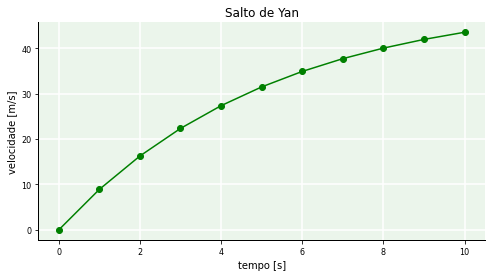

In [2]:
# velocidade no salto de Yan
from numpy import exp
from matplotlib.pyplot import subplots

v_yan = []
t = 0
while t <= 10:
    v = ((9.8 * 65)/12.5)*(1 - exp(-(12.5/65)*t))   
    v_yan.append(v)
    print(f'v(t={t}) = {v:.4f} [m/s]')
    t += 1
else:
    print('--> Abertura do paraquedas.')
    
# plotagem    
fig, ax = subplots(figsize=(8,4))
ax.plot(v_yan,'o-g')
ax.set_xlabel('tempo [s]')
ax.set_ylabel('velocidade [m/s]')
ax.set_title('Salto de Yan');

Porém, Celso, irmão de Yan, também saltou com ele, em separado. Celso, tem mais 20kg a mais do que Yan. Então, vamos ver como a massa influenciou a velocidade no salto de Celso e comparas as curvas. Podemos usar o mesmo programa, porém alterar o valor da massa.

v(t=0) = 0.0000 [m/s]
v(t=1) = 9.1135 [m/s]
v(t=2) = 16.9806 [m/s]
v(t=3) = 23.7719 [m/s]
v(t=4) = 29.6344 [m/s]
v(t=5) = 34.6952 [m/s]
v(t=6) = 39.0638 [m/s]
v(t=7) = 42.8351 [m/s]
v(t=8) = 46.0905 [m/s]
v(t=9) = 48.9008 [m/s]
v(t=10) = 51.3268 [m/s]
--> Abertura do paraquedas.


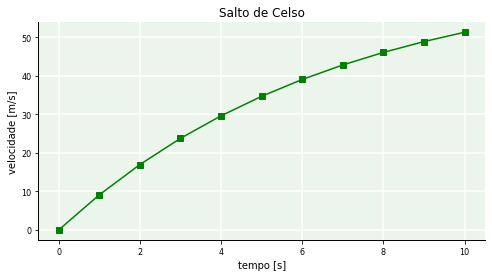

In [3]:
# velocidade no salto de Yan
from numpy import exp
from matplotlib.pyplot import subplots

v_celso = []
t = 0
while t <= 10:
    v = ((9.8 * (85))/12.5)*(1 - exp(-(12.5/85)*t))   
    v_celso.append(v)
    print(f'v(t={t}) = {v:.4f} [m/s]')
    t += 1
else:
    print('--> Abertura do paraquedas.')
    
# plotagem    
fig, ax = subplots(figsize=(8,4))
ax.plot(v_celso,'s-g')
ax.set_xlabel('tempo [s]')
ax.set_ylabel('velocidade [m/s]')
ax.set_title('Salto de Celso');

Nossos cálculos mostram que, para 10 segundos, Yan e Celso atingiram velocidades de cerca de 43,51 m/s e 51,33 m/s, respectivamente. Em outras palavras, com 30% a mais de massa, Celso teve sua velocidade acrescida de 18% em relação à de Yan. Por isso, certamente chegou ao solo antes de seu irmão. 

Uma forma de aperfeiçoar o que fizemos seria escrever um código único, válido não só para os saltos de Yan e Celso, mas também para qualquer outra pessoa. Considerando a mesma condição do ambiente, seria mais ou menos assim:

v(t=0) = 0.0000 [m/s]
v(t=1) = 8.9153 [m/s]
v(t=2) = 16.2709 [m/s]
v(t=3) = 22.3397 [m/s]
v(t=4) = 27.3467 [m/s]
v(t=5) = 31.4778 [m/s]
v(t=6) = 34.8861 [m/s]
v(t=7) = 37.6982 [m/s]
v(t=8) = 40.0183 [m/s]
v(t=9) = 41.9325 [m/s]
v(t=10) = 43.5119 [m/s]
--> Abertura do paraquedas.
v(t=0) = 0.0000 [m/s]
v(t=1) = 9.1135 [m/s]
v(t=2) = 16.9806 [m/s]
v(t=3) = 23.7719 [m/s]
v(t=4) = 29.6344 [m/s]
v(t=5) = 34.6952 [m/s]
v(t=6) = 39.0638 [m/s]
v(t=7) = 42.8351 [m/s]
v(t=8) = 46.0905 [m/s]
v(t=9) = 48.9008 [m/s]
v(t=10) = 51.3268 [m/s]
--> Abertura do paraquedas.


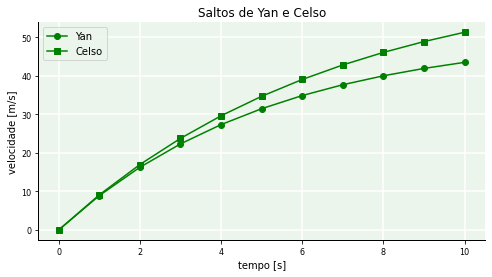

In [4]:
from numpy import arange, exp
from matplotlib.pyplot import subplots

def v(m,dt,T):

    # intervalo e velocidade
    t = arange(0,T+dt,dt)
    v = ((9.8 * m)/12.5)*(1 - exp(-(12.5/m)*t))   
    
    # impressão
    for ti in t:        
        print(f'v(t={ti}) = {v[ti]:.4f} [m/s]')
    print('--> Abertura do paraquedas.')
    
    # retorno
    return t,v
    

# cálculo para Yan, Celso
t_yan, v_yan = v(65,1,10)
t_celso, v_celso = v(85,1,10)

    
# plotagem    
fig, ax = subplots(figsize=(8,4))
ax.plot(t_yan,v_yan,'o-g',label='Yan')
ax.plot(t_celso,v_celso,'s-g',label='Celso')
ax.set_xlabel('tempo [s]')
ax.set_ylabel('velocidade [m/s]')
ax.set_title('Saltos de Yan e Celso')
ax.legend();


Este breve exemplo nos mostra a implementação de um modelo matemático em Python, onde utilizamos partes de programação _estruturada_ e _modular_. Estruturada, no sentido das instruções e modular no sentido de que aproveitamos os _módulos_ `numpy` e `matplotlib` para invocarmos a função exponencial `exp` e as funções de plotagem gráfica, especialmente `plot`.


### Deslocamento até a abertura do paraquedas

Sabemos da Física e do Cálculo que o deslocamento é a integral da velocidade com relação ao tempo. Portanto, se $D_Y$ e $D_C$ foram os deslocamentos de Yan e Celso em seus saltos, podemo usar a integral:

$$D = \int_0^{10} v(t) \, dt,$$

em cada caso para computar esses deslocamentos. No Python, podemos fazer isso com o código abaixo (que você entenderá mais tarde como fazer).

In [5]:
from sympy import symbols, exp, integrate

# função v(t)
t,g,m,c = symbols('t g m c')
v = g*m/c*(1 - exp(-c/m*t))

# integração numérica
s1 = integrate(v,(t,0,10)).subs({'m':65.0,'g':9.8,'c':12.5})
s2 = integrate(v,(t,0,10)).subs({'m':85.0,'g':9.8,'c':12.5})

print(f'Yan voou incríveis DY = {s1:.2f} metros em 10 segundos!')
print(f'Celso voou incríveis DC = {s2:.2f} metros em 10 segundos!')

Yan voou incríveis DY = 283.34 metros em 10 segundos!
Celso voou incríveis DC = 317.38 metros em 10 segundos!


## Programação estruturada e modular


### Prgramação estruturada

A idéia central por trás da programação estruturada é que qualquer algoritmo numérico pode ser composto de três estruturas de controle fundamentais: _sequencia_, _seleção_ e _repetição_.

Nos primórdios da computação, os programadores usualmente não prestavam muita atenção ao fato de o programa ser claro e fácil de entender. Hoje, é reconhecido que existem muitos benefícios em escrever um código bem organizado e bem estruturado. Além do benefício óbvio de tornar o software mais fácil de ser compartilhado, isso também ajuda a garantir um desenvolvimento de programa mais eficiente.

Portanto, algoritmos bem estruturados são, invariavelmente, fáceis de corrigir e testar, resultando em programas que têm um tempo de desenvolvimento e atualização menor. Embora a programação estruturada seja flexível o suficiente para permitir criatividade e expressões pessoais, suas regras impõem restrições suficientes para garantir um código final de mais qualidade, mais limpo e mais elegante, quando comparada à versão não estruturada.

### Programação modular 

Na programação modular, a idéia é que cada módulo desenvolva uma tarefa específica e tenha um único ponto de entrada e um único ponto de saída, de modo que o desenvolvedor possa reutilizá-lo invariavelmente em várias aplicações. 

Dividir tarefas ou objetivos em partes mais simples é uma maneira de torná-los mais fáceis de tratar. Pensando dessa maneira, os programadores começaram a dividir grandes problemas em subproblemas menores, ou **módulos**, que podem ser desenvolvidos de forma separada e até mesmo por pessoas diferentes, sem que isso interfira no resultado final.

Hoje em dia, todas as linguagens de programação modernas, tais como C++, Java, Javascript e a própria Python utilizam módulos (também conhecidos como _pacotes_ ou _bibliotecas_). Algumas características diferenciais da programação modular são a manutençao facilitada e a reusabilidade do código em programas posteriores.

Abaixo, mostramos um exemplo avançado de como criar um módulo em Python para lidar com pontos na Geometria Plana. 
Nosso módulo poderia ser salvo em um arquivo chamado `ponto.py`, por exemplo e utilizado em programas próprios que viermos a desenvolver. Neste exemplo, a _classe_ `Ponto` possui funções para realizar as seguintes operações: 

- criar um novo ponto;

- calcular a distância Euclidiana entre dois pontos;

- calcular a área de um triângulo pela fórmula de Heron e 

- imprimir o valor da área de um triângulo.


In [6]:
# ponto.py

import numpy as np 
import matplotlib.pyplot as plt

class Ponto:
    """
        Classe que implementa pontos no espaço 2D.
    """

    # inicialização de um ponto arbitrário com coordenadas (xp,yp)
    def __init__(self, xp, yp):
        self.x = xp
        self.y = yp

    # fórmula da distância entre dois pontos
    def dist(P1,P2):                                        
        return ( (P2.x - P1.x)**2 + (P2.y - P1.y)**2 )**0.5
    
    # área de um triângulo ABC pela fórmula de Heron 
    def area_heron(P1,P2,P3):
                
        a = Ponto.dist(P1,P2)  # comprimento |AB|
        b = Ponto.dist(P2,P3)  # comprimento |BC|
        c = Ponto.dist(P3,P1)  # comprimento |CA|
        
        p = 0.5*(a + b + c)  # semiperímetro 
        
        A = ( p*(p - a)*(p - b)*(p - c) )**0.5  # área
        
        return A
    
    def imprime_area_triangulo(P1,P2,P3):
                
        area = Ponto.area_heron(P1,P2,P3)                        
        print(f'Triângulo P1({P1.x}.{P1.y}); P2({P2.x}.{P2.y}); P3({P3.x}.{P3.y}) :: Área = {area:.4f}')
    

#### Exemplo: usando a classe `ponto.py` para calcular a área de um triângulo retângulo

In [7]:
# Cálculo da área para o triângulo 
# P1 = (0,0);  P2 = (1,0);  P3 = (0,1)

P1 = Ponto(0.0,0.0)
P2 = Ponto(1.0,0.0)
P3 = Ponto(0.0,1.0)
Ponto.imprime_area_triangulo(P1,P2,P3)

Triângulo P1(0.0.0.0); P2(1.0.0.0); P3(0.0.1.0) :: Área = 0.5000


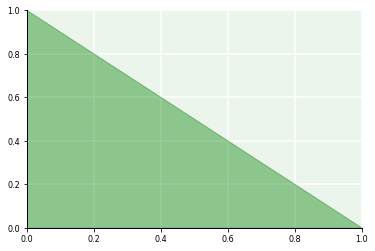

In [8]:
# plotagem do triângulo
P = np.array([[P1.x,P1.y],[P2.x,P2.y],[P3.x,P3.y]])
plt.figure()
pol = plt.Polygon(P,color='green',alpha=0.4)
plt.gca().add_patch(pol);

#### Exemplo: usando a classe `ponto.py` para calcular a área de um triângulo qualquer

Triângulo P1(4.0.2.0); P2(1.5.1.5); P3(2.0.-3.0) :: Área = 5.7500


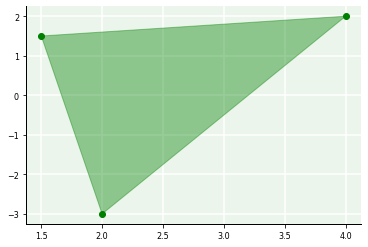

In [9]:
# Cálculo da área para o triângulo 
# P1 = (4,2);  P2 = (3,2);  P3 = (2,-3)

P4 = Ponto(4.0,2.0)
P5 = Ponto(1.5,1.5)
P6 = Ponto(2.0,-3.0)
Ponto.imprime_area_triangulo(P4,P5,P6)

plt.figure()
plt.scatter(P4.x,P4.y,color='green')
plt.scatter(P5.x,P5.y,color='green')
plt.scatter(P6.x,P6.y,color='green')

Px = [P4.x,P5.x,P6.x]
Py = [P4.y,P5.y,P6.y]
plt.fill(Px,Py,color='green',alpha=0.4);

## O quarto paradigma da ciência


Métodos numéricos tradicionais têm sido cada vez mais hibridizados em associados com algoritmos e técnicas aderentes ao domínio dos sistemas inteligentes, principalmente com o aprendizado de máquina. Muitos conceitos nativos da computação numérica são explorados também no escopo da inteligência artificial, temas que são vistos como a crista da onda do quarto paradigma da ciência: a datificação. 

O texto a seguir, que discorre essencialmente sobre a emergência de um novo "modo de se computar coisas" através do que se conhece por _engenharia computacional centrada em dados_, pode ser encontrado em sua forma expandida [clicando aqui](https://tril.ci.ufpb.br/2021/10/16/engenharia-computacional-para-um-mundo-centrado-em-dados/).


Durante uma palestra proferida na Califórnia em 2009 para o _Computer Science and Telecommunications Board – National Research Council (NRC- CSTB)_, o renomado cientista da computação Jerry Nicholas “Jim” Gray (1944 – 2012), pontuou o surgimento do quarto paradigma da ciência. Ao utilizar o termo “eScience”, Gray queria dizer que a exploração científica seria grandemente influenciada pelo uso intensivo dos dados nos anos vindouros.

A evolução dos supercomputadores nesses últimos vinte anos elevou a capacidade de compreensão da natureza e permitiu que a ciência subisse mais um degrau na escada do conhecimento. A fim de entender o que é o quarto paradigma da ciência, vejamos quais são os três primeiros retrocedendo no tempo.

Há alguns milhares de anos, a ciência era essencialmente **empírica**. Tentava-se compreender os fenômenos naturais pela observação. Há algumas centenas de anos, equações, modelos e generalizações possibilitaram que a ciência se tornasse **teórica**, ou seja, passou-se a descrever com clareza e tecnicidade como um certo fenômeno funcionava. De algumas décadas para cá, as simulações de alta complexidade revelaram o terceiro pilar da ciência, tornando-a **computacional**. Atualmente, o amálgama entre teoria, experimentação e computação gerou uma vertente de **exploração dos dados**. Em outras palavras, poderíamos dizer que a ciência agora possui uma quarta faceta. Ela se tornou “datificada”.

Os dados são exploráveis porque um dia puderam ser capturados, mensurados, processados e simulados. Diante disso, a ciência atual é:

1. Experimental;
2. Teórica;
3. Computacional e
4. Datificada,

sendo o último paradigma a consumação dos três anteriores.

### Ciência e Engenharia Computacional

A **Ciência e Engenharia Computacional**, internacionalmente conhecida pelo acrônimo CSE (_Computational Science and Engineering_) é uma área interdisciplinar que compreende a ciência da computação, matemática aplicada, biologia e outras áreas do núcleo STEM (_Science, Technology, Engineering, and Mathematics_) voltada à resolução de problemas práticos das engenharias. A característica peculiar da CSE é o uso de métodos numéricos e sua integração com modelos matemáticos para subsidiar simulações computacionais e a resolução de equações diferenciais ordinárias ou parciais.

Equações diferenciais descrevem uma ampla variedade de fenômenos físicos, desde a absorção de um fármaco pelo organismo humano em escala nanométrica, até as ondas de choque macroscópicas causadas pela explosão de uma dinamite. Estes são apenas dois exemplos de situações que interessariam a indústria de biotecnologia e de construção ocorrendo em escalas extremamente distintas. Portanto, a CSE é afeita a problemas do mundo real caracterizados por multi-escalas pelos quais se compreende a dinâmica intrínseca de um fenômeno complexo modelável analiticamente.

### Por que a CSE importa em um mundo de dados?

Embora em muitas áreas já se saiba com riqueza de detalhes como mecanismos intrínsecos de sistemas dinâmicos funcionam, em outras, este não é o caso. A indisponibilidade de dados em certos domínios do conhecimento decorre, principalmente, da dificuldade de capturá-los e coletá-los, seja pela inexistência de infraestrutura tecnológica, seja pelo alto investimento necessário para obtê-los. Um exemplo é a exploração da subsuperfície terreste. Dominar o conhecimento acerca da mecânica das rochas, a salinidade de aquíferos, o potencial geotérmico, ou a constituição química do gás natural nas partes mais baixas do planeta equivale a adentrar dezenas, centenas ou milhares de quilômetros na litosfera. Essa não é uma tarefa fácil. Pelo contrário, há tantas variáveis, riscos e custos envolvidos que sua execução pode ser inviabilizada.

A CSE entra em cena para preencher lacunas que os “dados”, por si só, não conseguem fechar. Uma vez que a exploração de dados só é exequível quando os próprios dados estão disponíveis, seria impossível explorar dados acerca de algo desconhecido. Claramente, seria paradoxal. Para dar outra ilustração, tomemos o exemplo das imagens digitais. A tecnologia atual provê condições suficientes para tirarmos fotos de milhares de objetos, seres e indivíduos (p.ex. uma formiga, um prédio, um planeta) sem qualquer dificuldade.

Processar imagens, hoje em dia, é um dos grandes carros-chefe para que modelos de inteligência artificial sejam implementados com precisão. Mas a manipulação de imagens só é possível por causa do progresso na física, óptica álgebra linear – afinal, imagens são matrizes – e ciência dos materiais – para construir carcaças de celulares, câmeras DSLR e satélites.

Aqui, cabe uma pergunta: será que no processos de fabricação desses componentes materiais, ninguém apelou para simulações computacionais? É bem improvável, porque nenhum gestor aprovaria o envio de um satélite responsável por fotografar o oceano Atlântico para o espaço sem ter uma margem aceitável de confiabilidade de que ele orbitaria corretamente e cumpriria seu propósito com segurança. E como se adquire essa confiabilidade? Vai-se para um laboratório, cria-se um protótipo e faz-se 1, 2, 10, 1.000, 100.000 simulações, até que se reduzam ao máximo as incertezas.

Estando em algum lugar entre o terceiro e o quarto paradigma, a CSE não apenas intermedia a análise de incertezas, como também simula processos, assim gerando economia de recursos. A CSE usa o primeiro, o segundo e o terceiro na transição para o quarto paradigma e, naturalmente, agrega valor a processos de um mundo que vive em transição tecnológica.

### Engenharia centrada em dados: um novo ramo na árvore do futuro?

Mark Girolami, um professor de Engenharia Civil em Cambridge, liderou um grande programa de ciência de dados e inteligência artificial no [Alan Turing Institute](https://turing.ac.uk/) entre os anos de 2017 e 2020. Em sua percepção, a ciência de dados já havia se impregnado nas engenharias de tal forma que a inauguração de um novo termo para descrever essa interseção crescente seria justificável. Ele o chamou de engenharia centrada em dados (data-centric engineering, ou DCE).

Segundo Girolami, a DCE é explicada por um desenvolvimento substancial que impacta as engenharias, profissões associadas, suas práticas e também a política. Ao relembrar que a engenharia erigiu-se sobre dados desde seus primórdios, citou em seu artigo uma clássica fala de Lord Kelvin de 1889:

>“Quando você pode medir o que está falando e expressar isso em números, você sabe alguma coisa sobre aquilo; quando não o pode expressar em números, seu conhecimento é escasso e insatisfatório; pode ser o princípio do conhecimento, mas você, em seus pensamentos, empurrou parcamente a fronteira da ciência.” [tradução livre]

Em suma, “medir é saber”. Girolami então pontuou que dados derivados da observação e medição experimentais foram os responsáveis por conduzir o desenvolvimento da filosofia natural e impulsionar o estado-da-técnica da engenharia por todo o século XIX. Em suas palavras,

>“os dados sempre estiveram no coração da ciência e da prática na engenharia”.

Com a irrupção da DCE, uma pergunta que se faz é: seria a DCE um novo ramo na árvore do futuro da ciência de dados? Enquanto uma resposta objetiva é aguardada, poderíamos intuir, com base na opinião de vários experts que se reuniram no DCEng Summit, realizado no último setembro, em Londres, que as engenharias não serão mais as mesmas daqui para a frente. É consensual que o big data abriu enormes oportunidades para praticamente todas as áreas da engenharia – Aeronáutica, Civil, Mecânica, Offshore, entre outras – haja vista o nível de detalhamento provido por muitos bancos de dados quanto no que tange à compreensão de variados fenômenos que foram observados e medidos experimentalmente ao longo de décadas. Entretanto, uma gama de desafios acompanha essa evolução furtivamente. Ética e privacidade na gestão de dados, lentidão da difusão tecnológica em países de baixa renda e carência de profissionais qualificados e currículos contemporâneos são alguns deles.

Ley et al., emitindo pontos de vista sobre como a DCE se projeta em suas áreas de atuação – estatística, engenharia e desenvolvimento de software –, concluíram que:

1. o pensamento centrado em dados tornou-se necessário em vários domínios do conhecimento e a riqueza por eles disponibilizada acelerará a pesquisa no âmbito da engenharia de maneira imensurável;
2. dados solitários não valem muita coisa e podem transmitir mensagens equivocadas se não forem analisados com cuidado e geridos de forma segura;
3. pelo fato de a educação baseada em dados ser uma habilidade indispensável para a formação de futuros engenheiros, as universidades, empresas e gestores devem se mobilizar para assegurar um currículo interdisciplinar que forme profissionais com “mente aberta” e explore habilidades flexíveis capazes de lidar com dados.

Na Engenharia Mecânica, em particular, o conceito de **ciência de dados mecanicista** (_mechanistic data science_, MDS) e sua incorporação na educação de engenheiros, bem como de estudantes de nível médio nos Estados Unidos foi recentemente debatida no [16th USCCM](http://16.usnccm.org/SC16-002) e na conferência [MMLDT-CSET 2021](https://mmldt.eng.ucsd.edu/short-course). A proposta da MDS é explanada, por exemplo, nesta [apresentação](https://www.imagwiki.nibib.nih.gov/sites/default/files/liu_pdf_usnccm2019_lecture1.pdf) do Prof. Wing Kam Liu da Northwestern University.

### Engenharia computacional no enfrentamento da Covid-19

A pandemia da Covid-19 desencadeou enormes desafios para a comunidade global. Concomitantemente, pesquisadores de diversas áreas mobilizaram-se para apresentar estratégias de enfrentamento à doença e propostas para mitigação dos riscos de contaminação do vírus SARS-CoV-2. A CSE não ficou de fora. A dinâmica dos fluidos computacional (computational fluid dynamics, CFD) contribuiu magnificamente para a elaboração de protocolos, equipamentos de proteção individual e coletiva, bem como para controle de engenharia em ambientes hospitalares. A seguir, parafraseamos três objetivos reportados pela Siemens Digital Industries Software em estudos de caso reais guiados por CFD:

entender a dinâmica espaço-temporal de partículas virais exaladas por seres humanos na forma de gotículas e aerossóis;
aperfeiçoar o projeto de sistemas de ventilação interior, bem como de exaustão e filtração visando conforto e segurança hospitalar;
projetar equipamentos respiratórios, dispositivos para esterilização, purificação e produção de vacinas.

## Frontispício

A datificação está se consolidando como o quarto paradigma da ciência e a engenharia será cada vez mais influenciada por uma cultura baseada em dados. No [TRIL Lab](http://tril.ci.ufpb.br), defendemos uma formação estratégica e trabalhamos para que nossos alunos e colaboradores se adaptem a um cenário que demanda cada vez mais habilidades flexíveis e interdisciplinaridade. Em um mundo centrado em dados, a engenharia computacional terá um leque incomensurável de oportunidades, compreendendo, modelando e resolvendo problemas de engenharia do mundo real.

O conteúdo deste livro tem o objetivo de proporcionar a nossos estudantes uma formação moderna e ampla em métodos numéricos com aplicações às ciências computacionais e engenharias. Entretanto, qualquer perfil profissional que se beneficie da computação científica terá nele um estímulo adicional para enveredar-se pelo frutífero e versátil universo das técnicas fundamentais da engenharia computacional.

In [10]:
plt.rcdefaults()